In [63]:
import numpy as np
from importlib import reload
import astropy.units as u
from astropy.units import Quantity
from mpl_toolkits.mplot3d import Axes3D
from astroquery.gaia import Gaia
from astropy.table import QTable

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [7]:
job = Gaia.launch_job_async("SELECT source_id, ra, dec, parallax, phot_g_mean_mag \
FROM gaiadr1.tgas_source \
WHERE parallax >= 3.333333 AND phot_g_mean_mag < 11 AND parallax_error < 0.314159" \
                           , dump_to_file=True)
print(job)

Launched query: 'SELECT source_id, ra, dec, parallax, phot_g_mean_mag FROM gaiadr1.tgas_source WHERE parallax >= 3.333333 AND phot_g_mean_mag < 11 AND parallax_error < 0.314159'
Retrieving async. results...
Jobid: 1519416084326O
Phase: None
Owner: None
Output file: async_20180223120124.vot
Results: None


In [70]:
#initial grab with only parallax limit to < 3.33333 and G-band magnitude to < 20
table3 = QTable.read('async_20180220140057.vot', format='votable')
print(table3)

     source_id              ra         ...      parallax       phot_g_mean_mag  
                           deg         ...     Angle[mas]       Magnitude[mag]  
------------------- ------------------ ... ------------------ ------------------
 510179408242548736 21.572401117348235 ...  3.333337207495958 11.175918874199617
4205661834858348672  285.5519223205407 ... 3.3333401766663426 10.097661616048072
1856655091517580288   308.499255158565 ... 3.3333451927253597 12.492861810252421
 311494770885135744  16.55087539976397 ... 3.3333546044058378  8.793189531788062
2464155057067665536 26.900678181709676 ...  3.333358847191919  11.99352753812773
1622216054007117440 241.73861206142863 ... 3.3333636097796857  11.66742261222085
3899815564440242560 180.79319343700067 ... 3.3333688849110352 11.821875710721399
2244142952148379136 303.34922505569557 ... 3.3333695596843307 11.619843685402847
2098420106274189696  280.2889609699104 ...  3.333372263296319 10.709418277198807
5800980776431233024 263.2589

In [71]:
#updated SQL query to limit G-band magnitudes to < 11
table2 = QTable.read('async_20180223115303.vot', format='votable')
print(table2)

     source_id              ra         ...      parallax       phot_g_mean_mag  
                           deg         ...     Angle[mas]       Magnitude[mag]  
------------------- ------------------ ... ------------------ ------------------
4205661834858348672  285.5519223205407 ... 3.3333401766663426 10.097661616048072
 311494770885135744  16.55087539976397 ... 3.3333546044058378  8.793189531788062
2098420106274189696  280.2889609699104 ...  3.333372263296319 10.709418277198807
  75463400024659968  35.15008704069457 ... 3.3333883241336473 10.532819776698439
6557775523182879104  329.0305149993941 ...  3.333389540026992 10.654886303542536
 905067497529540736  125.7743091722678 ...  3.333389930156821   10.3762318017776
6368150621119752192  315.4256980946231 ...  3.333424608111585  10.26702166995925
5264083510511955072 109.09130537709642 ...  3.333424921793283 10.646833327070507
1757772128175786240 313.84532029536393 ... 3.3334256757999587 10.689829142452975
1827008581535328512  299.773

In [53]:
#updated SQL query to limit parallax error to < 0.314159
table = job.get_results()
print(table)

     source_id              ra         ...      parallax       phot_g_mean_mag  
                           deg         ...     Angle[mas]       Magnitude[mag]  
------------------- ------------------ ... ------------------ ------------------
4205661834858348672  285.5519223205407 ... 3.3333401766663426 10.097661616048072
 311494770885135744  16.55087539976397 ... 3.3333546044058378  8.793189531788062
  75463400024659968  35.15008704069457 ... 3.3333883241336473 10.532819776698439
6557775523182879104  329.0305149993941 ...  3.333389540026992 10.654886303542536
6368150621119752192  315.4256980946231 ...  3.333424608111585  10.26702166995925
5264083510511955072 109.09130537709642 ...  3.333424921793283 10.646833327070507
1827008581535328512  299.7730613367215 ... 3.3334316342909434  9.824043816033827
3049076070310478592 104.12073696157046 ... 3.3334319353860526  9.854919191328857
6077129478299330176 184.15150852178223 ... 3.3334374628383125 10.574592975253616
4734399178309369344  50.2558

In [54]:
ra = table['ra']
dec = table['dec']
plx = table['parallax']
plx = plx / 1000 #to arcseconds from mas
plx = 1/plx

In [62]:
#first attempt at calculating separation between sources
#obviously not a very good attempt
for c, table in enumerate(table, 1):
    separation = np.sqrt((ra[c] - ra[c-1])**2 + (dec[c] - dec[c-1])**2)
    #print(separation)

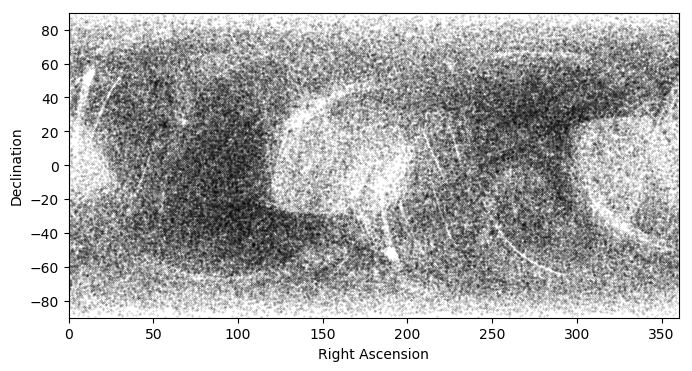

In [72]:
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
#fig.set_size_inches(8,8)
 
fig.tight_layout()

ax.set_xlim(0., 360.)
ax.set_ylim(-90., 90.)

ax.set_ylabel("Declination")
ax.set_xlabel("Right Ascension")
    
ax.plot(ra, dec, color='k', marker='.', markersize=0.6, linestyle='None', alpha=0.3);

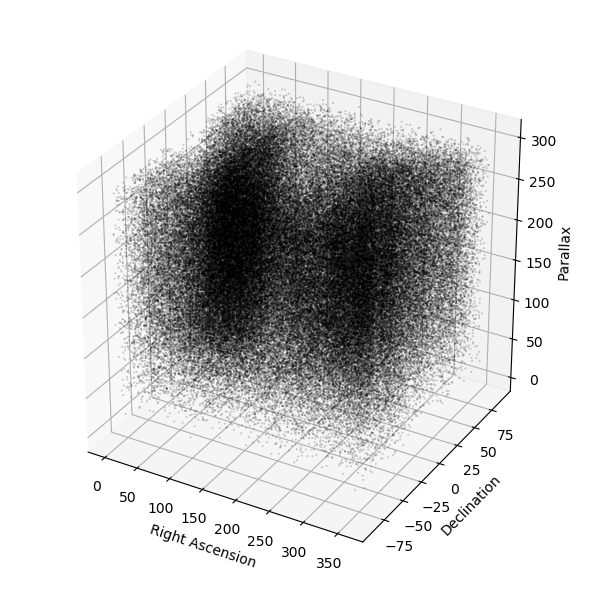

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

fig.set_size_inches(6,6)

fig.tight_layout()

ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_zlabel("Parallax")


ax.scatter(ra, dec, plx, c = 'k', s=0.1, alpha=0.3);

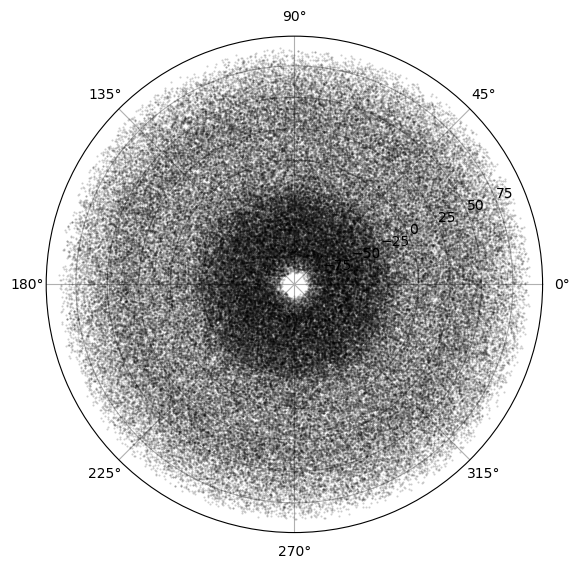

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='polar')

fig.tight_layout()

fig.set_size_inches(6,6)

ax.plot(ra, dec, marker=".", color='k', linestyle="None", markersize=1, alpha=0.2);

In [58]:
import ipyvolume as ipv
ipv.quickscatter(ra, dec, plx, size=0.15, color="blue")

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color=array('blue', dtype='<U4'), color_selected=array('white', dtype='<U5'), size=array(0.15), size_selected=array(2.6), x=array([285.55192232,  16.5508754 ,  35.15008704, ..., 313.33245585,
        92.64361965,   4.61210931]), y=array([ -7.0318432 ,  29.92242094,  13.65604858, ...,  62.15117255,
       -21.86762367,  44.02467259]), z=array([299.9993841 , 299.99808562, 299.99505091, ...,   7.0340582 ,
         5.7916844 ,   3.56201372]))], style={'axes': {'visible': True, 'label': {'color': 'black'}, 'ticklabel': {'color': 'black'}, 'color': 'black'}, 'box': {'visible': True}, 'background-color': 'white'}, tf=None, width=400, xlim=[0.0, 359.988380210588], ylim=[-89.86093703749167, 89.66446836915713], zlim=[0.0, 299.9993841012936]),))